# COMPARACIÓN DE TENSIONES EN ADC - DOS CORRIDAS 

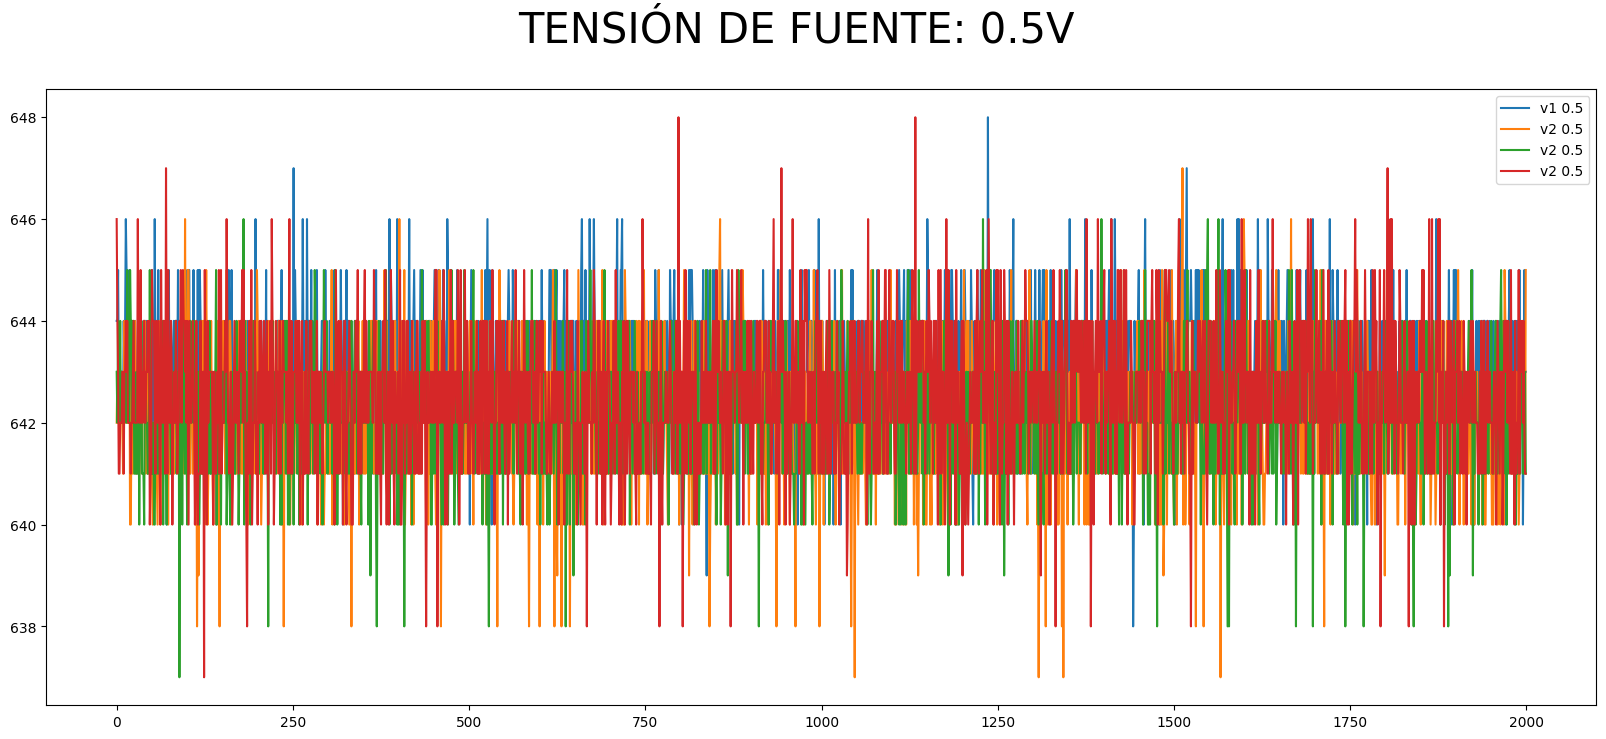

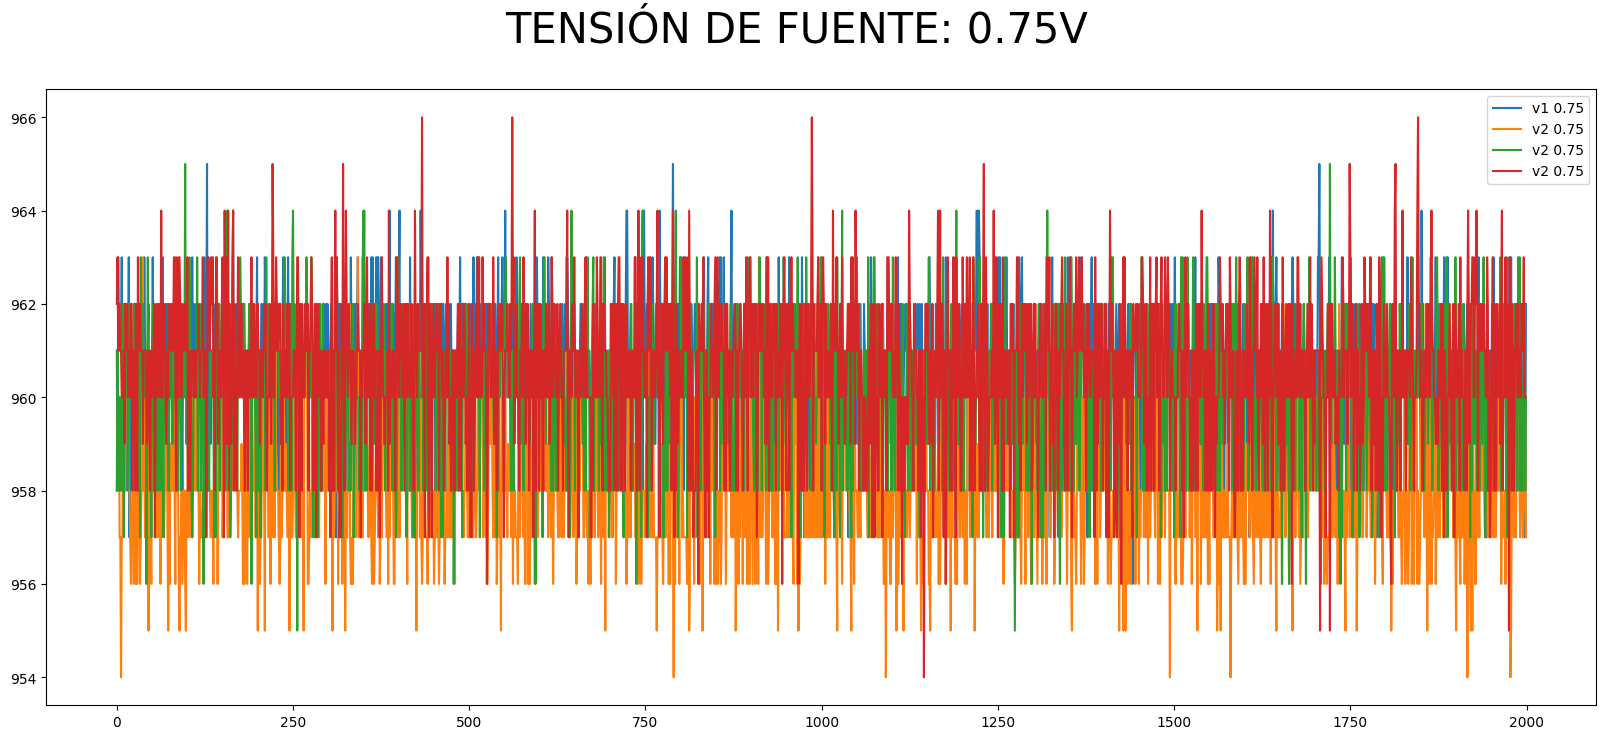

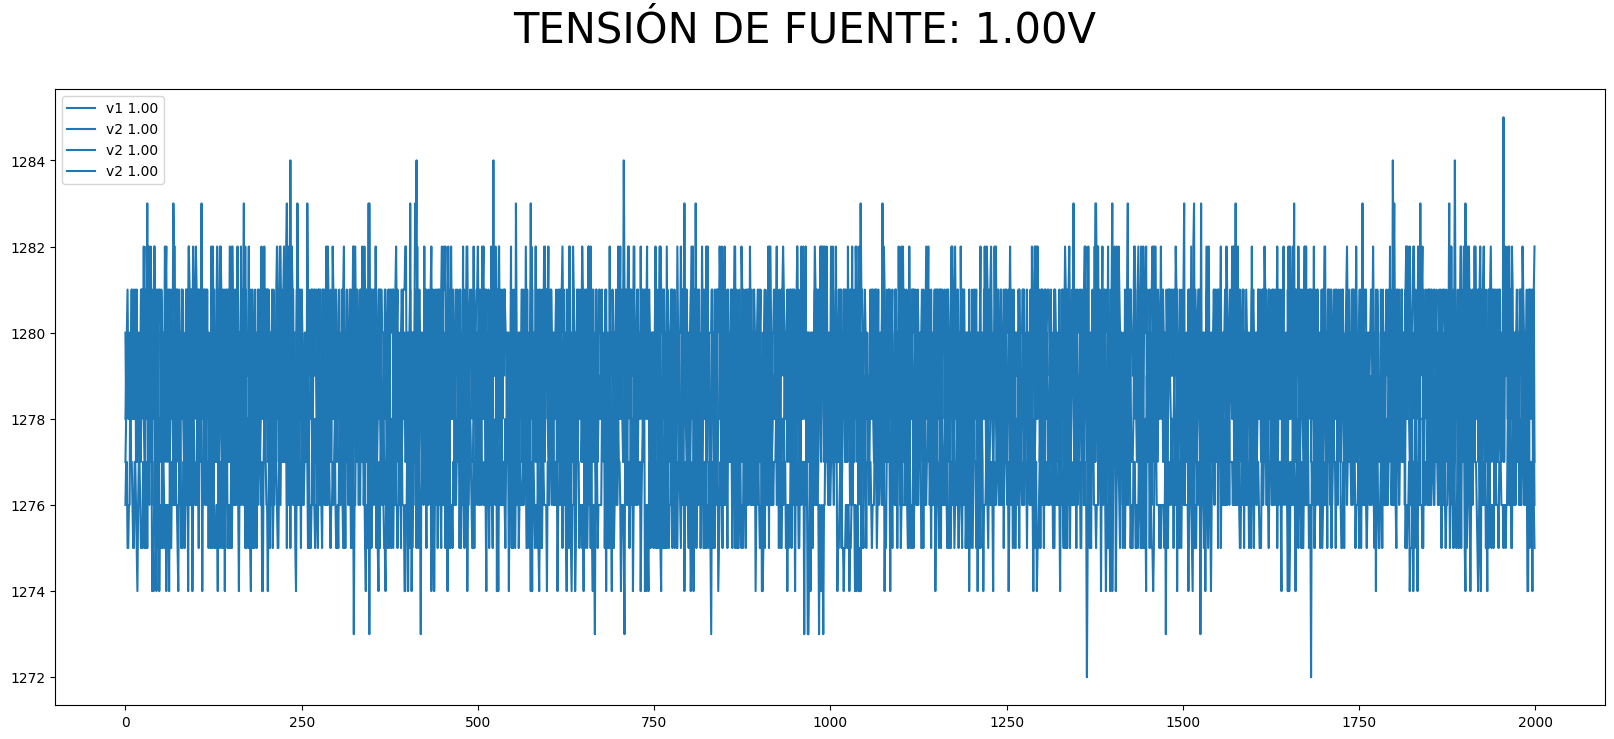

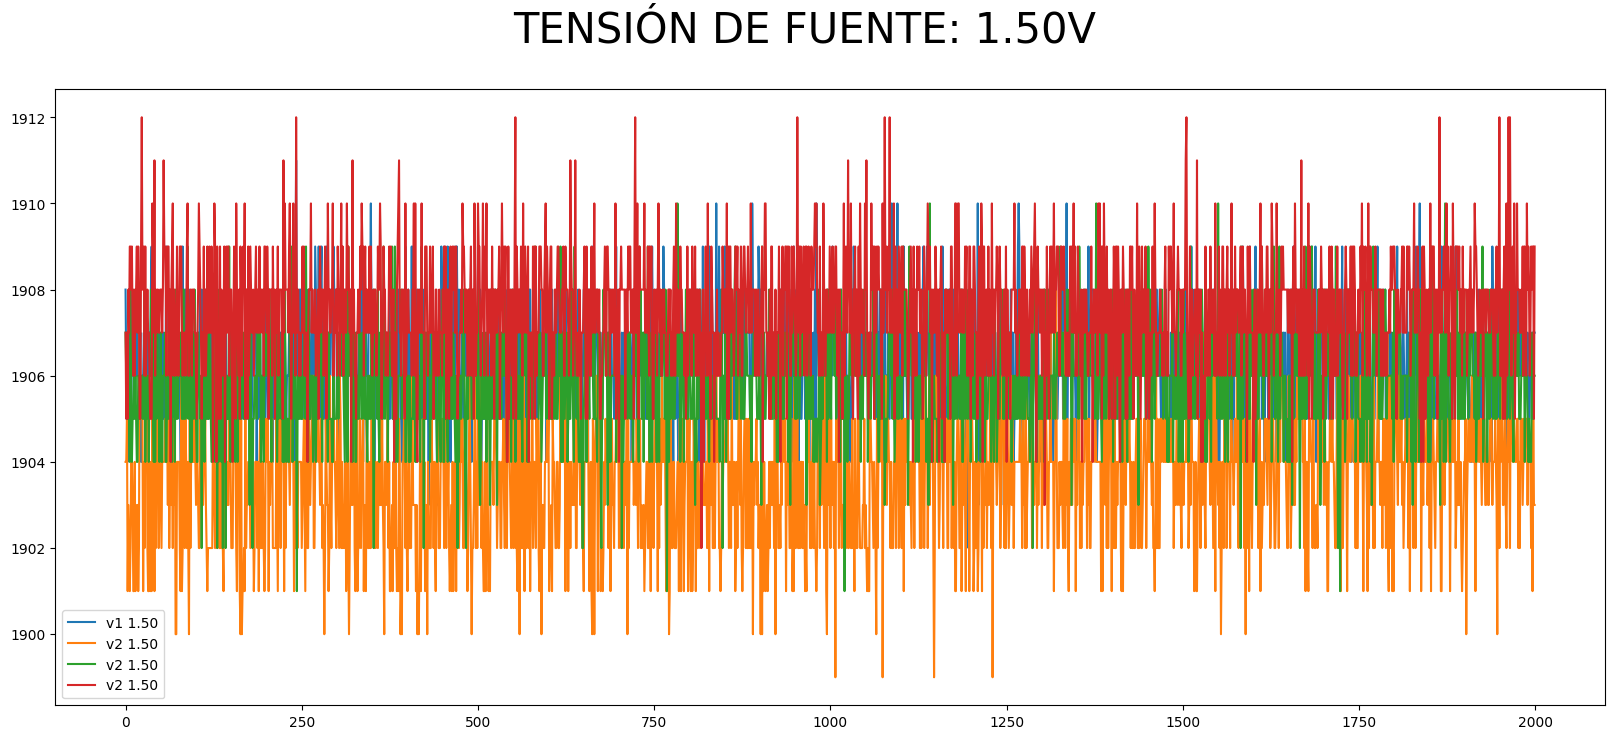

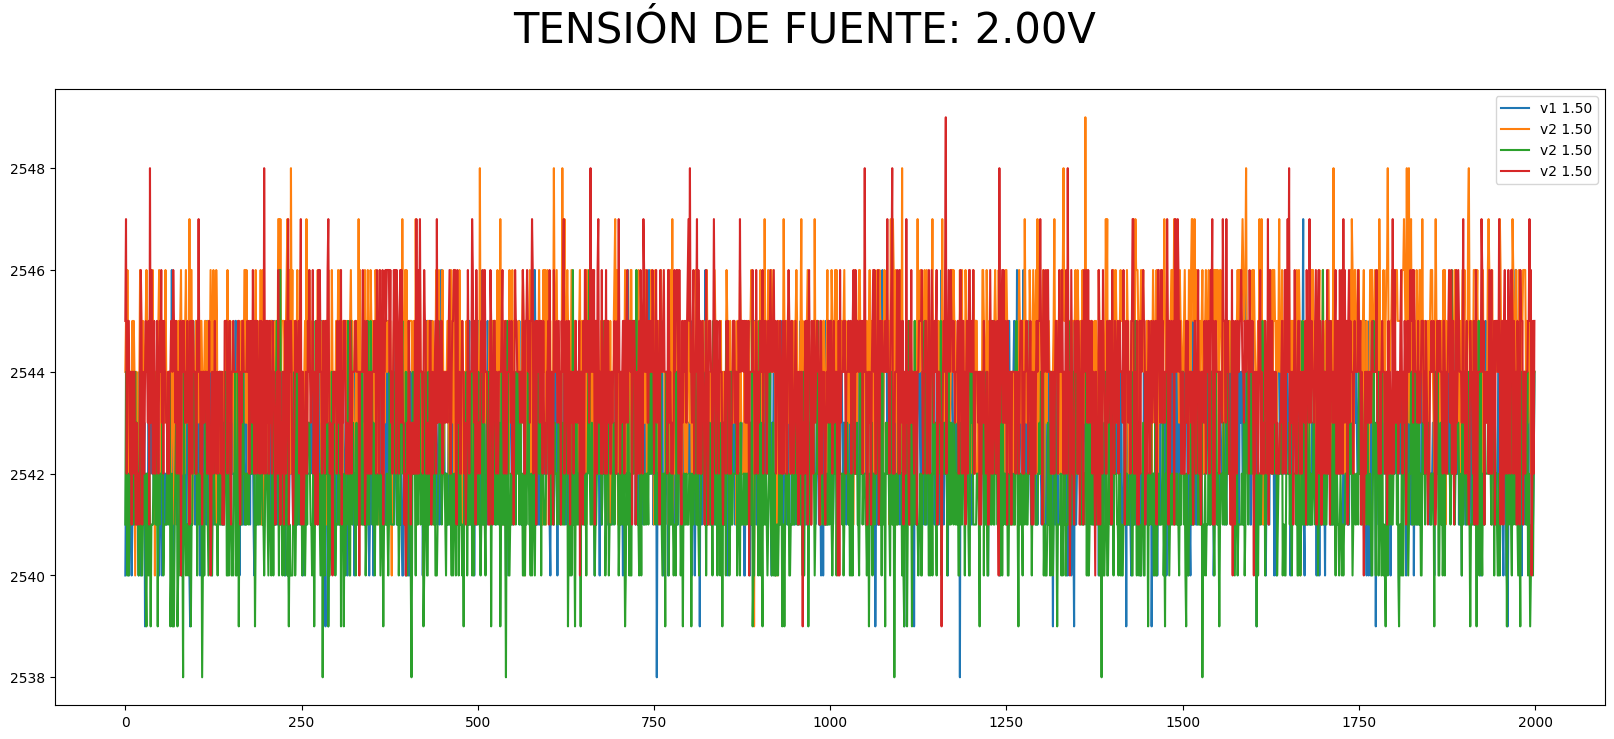

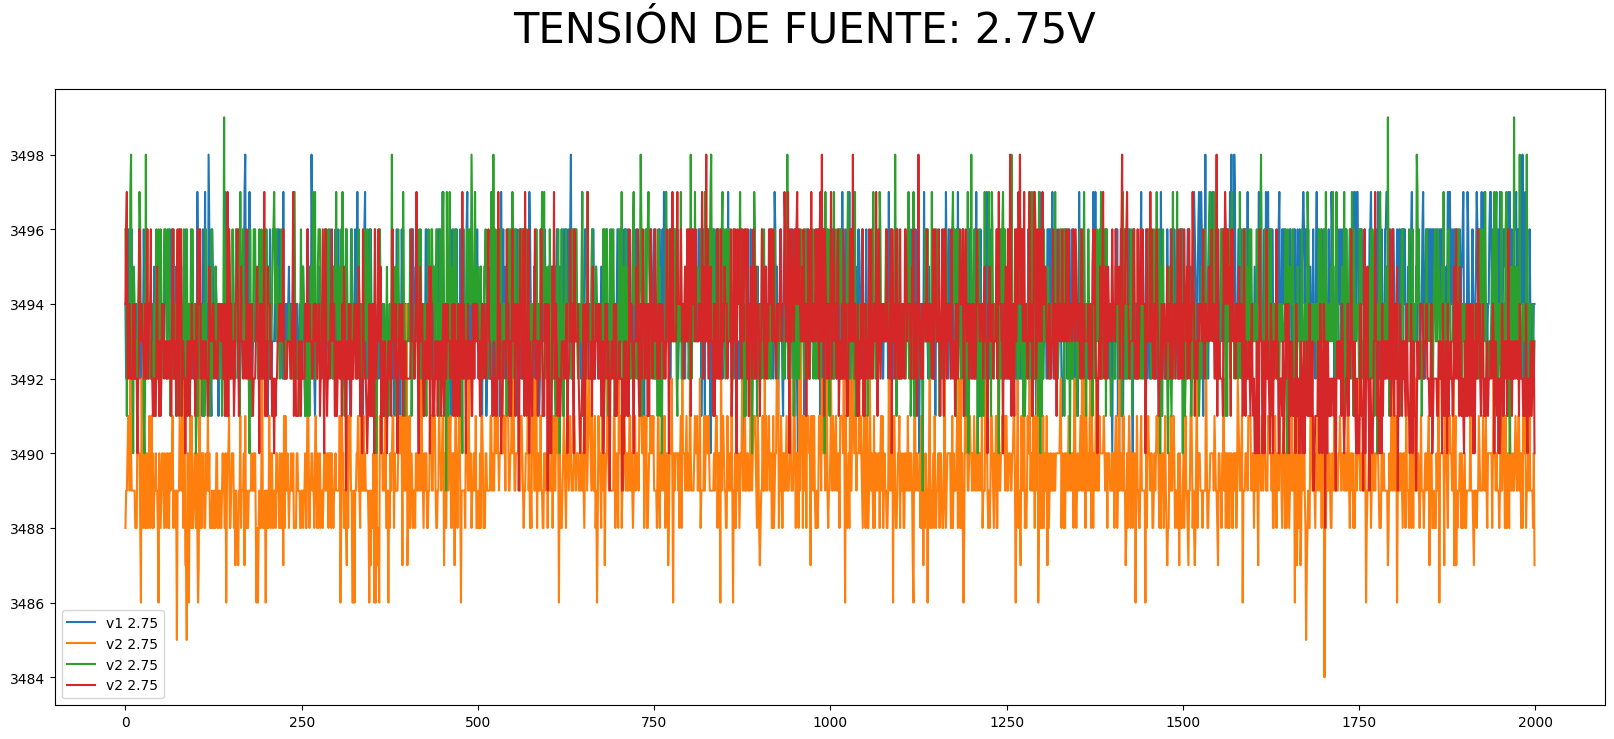

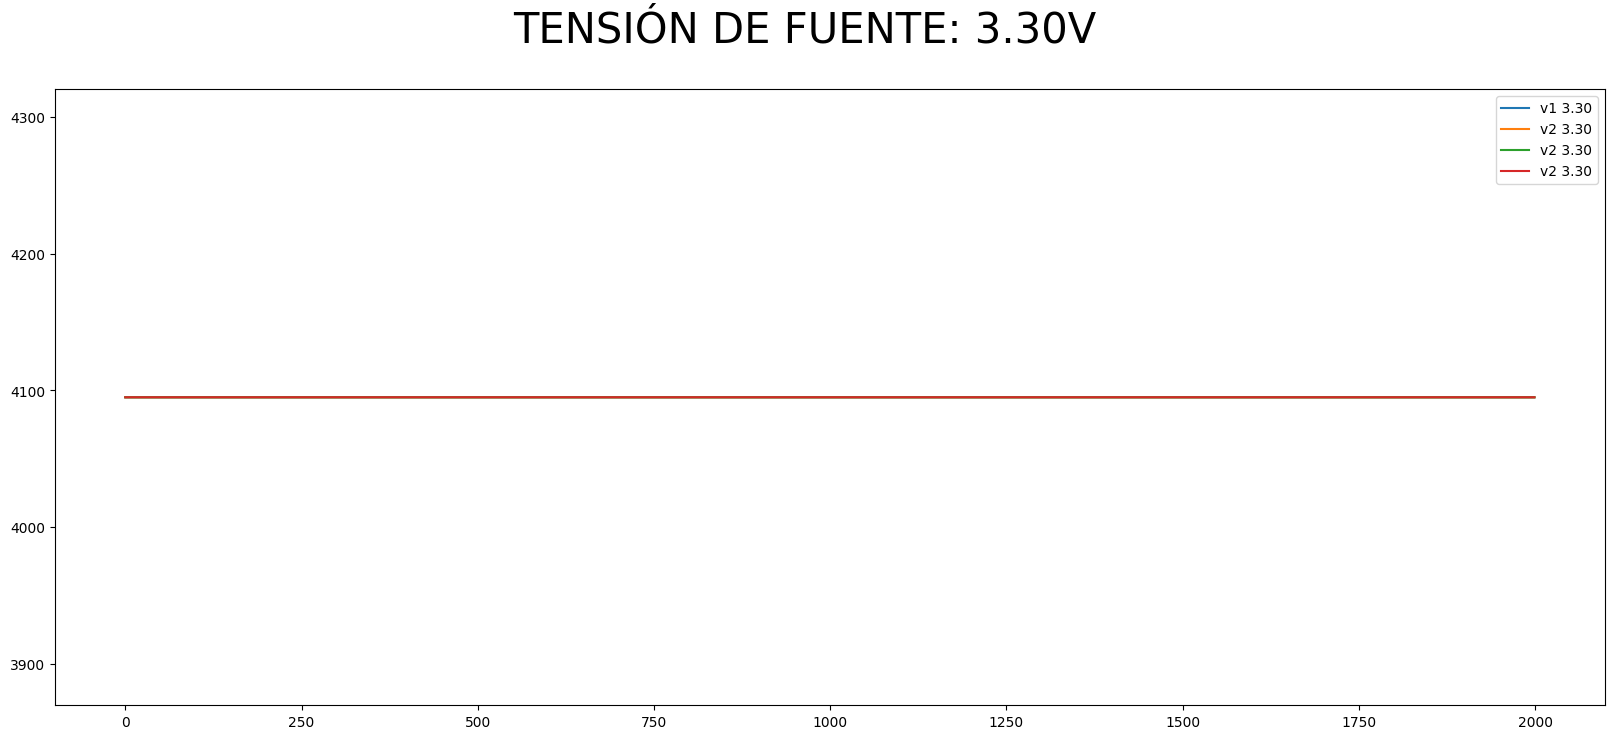

In [36]:
import matplotlib.pylab as plt
import numpy as np 
        


path_file = '../../../results/TC-I-ADC/'
path_fileIII = '../../../results/TC-III-ADC/'

list_files_tcI=['TC-I-ADC-0.5.txt','TC-I-ADC-0.75.txt','TC-I-ADC-1.00.txt','TC-I-ADC-1.50.txt','TC-I-ADC-2.00.txt','TC-I-ADC-2.75.txt', 'TC-I-ADC-3.30.txt']

list_files_tcIII = ['TC-III-ADC-0.50.txt',
                    'TC-III-ADC-0.75.txt',
                    'TC-III-ADC-1.00.txt',
                    'TC-III-ADC-1.50.txt',
                    'TC-III-ADC-2.00.txt',
                    'TC-III-ADC-2.75.txt',
                    'TC-III-ADC-3.30.txt']
path_fileVIvert = '../../../results/TC-IV-ADC/VERT/'
path_fileVIhor = '../../../results/TC-IV-ADC/HOR/'

list_files_tcVI =['TC-IV-ADC-0.50.txt',
        'TC-IV-ADC-0.75.txt',
        'TC-IV-ADC-1.00.txt',
        'TC-IV-ADC-1.50.txt',
        'TC-IV-ADC-2.00.txt',
        'TC-IV-ADC-2.75.txt',
        'TC-IV-ADC-3.30.txt']

voltage_source = [0.5,0.75,1.0,1.5,2.0,2.75,3.3]



NBITS = 12 
MAX_VALUE =4096 #2**12 
SOURCE_ADC_VOLTAGE = 3.30 #MEASURE OF GND -- extract value using a datasheet  
raw_adc_I = np.zeros((2000,len(list_files_tcI)),dtype=int)
raw_adc_II = np.zeros((2000,len(list_files_tcI)),dtype=int)
raw_adc_III = np.zeros((2000,len(list_files_tcI)),dtype=int)
raw_adc_IV = np.zeros((2000,len(list_files_tcI)),dtype=int)


v_compute_raw_adcI= np.zeros((2000,len(list_files_tcI)))
v_compute_raw_adcII= np.zeros((2000,len(list_files_tcI)))
v_compute_raw_adcIII= np.zeros((2000,len(list_files_tcI)))
v_compute_raw_adcVI= np.zeros((2000,len(list_files_tcI)))

ADC_voltage_expected_sourceI = []
ADC_mean_samplesI = []
ADC_max_sampleI = []
ADC_min_sampleI = [] 

ADC_voltage_expected_sourceII = []
ADC_mean_samplesII = []
ADC_max_sampleII = []
ADC_min_sampleII = [] 


ADC_voltage_expected_sourceIII = []
ADC_mean_samplesIII = []
ADC_max_sampleIII = []
ADC_min_sampleIII = [] 


ADC_voltage_expected_sourceIV = []
ADC_mean_samplesIV = []
ADC_max_sampleIV = []
ADC_min_sampleIV = [] 




### Values of compute of script 
##  Expected values compute 
## position indicate a file using a list_files_tcI
n_samples_adc = np.arange(0,2000,1.0,dtype=float) # eje x para gráficas ADC 


for i in range(0,len(voltage_source)):
    ADC_voltage_expected_sourceI.append(int( (MAX_VALUE/SOURCE_ADC_VOLTAGE)*voltage_source[i]))
    ADC_voltage_expected_sourceII.append(int(( (MAX_VALUE/SOURCE_ADC_VOLTAGE)*voltage_source[i])))
    ADC_voltage_expected_sourceIII.append(int(( (MAX_VALUE/SOURCE_ADC_VOLTAGE)*voltage_source[i])))
    ADC_voltage_expected_sourceIV.append(int(( (MAX_VALUE/SOURCE_ADC_VOLTAGE)*voltage_source[i])))

### PROCESSING FILES FOR EXTRACT DATA  - Files TCI      
i = 0 
for file in list_files_tcI:    
    d0,d1,d2 = np.genfromtxt(path_file+file, delimiter=',', dtype=None, encoding=None,unpack=True)
    d2 =d2.astype(int) 
    raw_adc_I[:,i] = d2 
    ADC_mean_samplesI.append(np.mean(d2))
    ADC_max_sampleI.append(np.amax(d2))
    ADC_min_sampleI.append(np.amin(d2))
    i = i +1 

### PROCESSING FILES FOR EXTRACT DATA  - Files TCIII      
i = 0 
for file in list_files_tcIII:    
    index,hex_diff,dec_diff,hex_ref,dec_ref,hex_raw_adc,dec_raw_adc = np.genfromtxt(path_fileIII+file, delimiter=',', dtype=None, encoding=None,unpack=True)
    dec_raw_adc = dec_raw_adc.astype(int)      
    ## load values in a column of vector 
    raw_adc_II[:,i] = dec_raw_adc 
    ADC_mean_samplesII.append(np.mean(dec_raw_adc))
    ADC_max_sampleII.append(np.amax(dec_raw_adc))
    ADC_min_sampleII.append(np.amin(dec_raw_adc))
    i = i + 1 

i = 0 


### PROCESSING FILES FOR EXTRACT DATA  - Files TCIV      

for file in list_files_tcVI:    
    index_vert, angle_ver, raw_ver= np.genfromtxt(path_fileVIvert+file, delimiter=',', dtype=None, encoding=None,unpack=True)
    index_hor, angle_hor, raw_hor= np.genfromtxt(path_fileVIhor+file, delimiter=',', dtype=None, encoding=None,unpack=True)
    raw_ver = raw_ver.astype(int) 
    raw_hor = raw_hor.astype(int) 
    raw_adc_III[:,i] = raw_ver 
    raw_adc_IV[:,i] = raw_hor 
    ADC_mean_samplesIII.append(np.mean(raw_ver))
    ADC_max_sampleIII.append(np.amax(raw_ver))
    ADC_min_sampleIII.append(np.amin(raw_ver))
    ADC_mean_samplesIV.append(np.mean(raw_hor))
    ADC_max_sampleIV.append(np.amax(raw_hor))
    ADC_min_sampleIV.append(np.amin(raw_hor))
    i = i + 1 





for i in range(0,len(list_files_tcI)): 
    v_compute_raw_adcI[:,i] = raw_adc_I[:,i]*(SOURCE_ADC_VOLTAGE/MAX_VALUE)
    v_compute_raw_adcII[:,i] = raw_adc_II[:,i]*(SOURCE_ADC_VOLTAGE/MAX_VALUE)
    v_compute_raw_adcIII[:,i] = raw_adc_III[:,i]*(SOURCE_ADC_VOLTAGE/MAX_VALUE)
    v_compute_raw_adcVI[:,i] = raw_adc_IV[:,i]*(SOURCE_ADC_VOLTAGE/MAX_VALUE)



colors = ['#1f77b4',
'#ff7f0e',
'#2ca02c',
'#d62728',
'#9467bd',
'#8c564b',
'#e377c2',
'#7f7f7f',
'#bcbd22',
'#17becf',
'#aec7e8',
'#ffbb78',
'#98df8a',
'#ff9896',
'#c5b0d5',
'#c49c94',
'#f7b6d2',
'#c7c7c7',
'#dbdb8d',
'#9edae5',
'#fdae61',
'#ff9896']## PLOTTING FIGURES 

######################################### SOURCE OF 0.5V  ###############################################################

figVolt05, ax05 = plt.subplots(figsize=(20,8))
figVolt05.suptitle('TENSIÓN DE FUENTE: 0.5V',fontsize = 30)
l1=ax05.plot(n_samples_adc, raw_adc_I[:,0],label='v1 0.5',color=colors[0])
l2=ax05.plot(n_samples_adc, raw_adc_II[:,0],label='v2 0.5',color=colors[1])
l3=ax05.plot(n_samples_adc, raw_adc_III[:,0],label='v2 0.5',color=colors[2])
l4=ax05.plot(n_samples_adc, raw_adc_IV[:,0],label='v2 0.5',color=colors[3])

ax05.legend()

######################################### SOURCE OF 0.5V  ###############################################################



######################################### SOURCE OF 0.75V  ###############################################################

figVolt075, ax075 = plt.subplots(figsize=(20,8))
figVolt075.suptitle('TENSIÓN DE FUENTE: 0.75V',fontsize = 30)
l1=ax075.plot(n_samples_adc, raw_adc_I[:,1],label='v1 0.75',color=colors[0])
l2=ax075.plot(n_samples_adc, raw_adc_II[:,1],label='v2 0.75',color=colors[1])
l3=ax075.plot(n_samples_adc, raw_adc_III[:,1],label='v2 0.75',color=colors[2])
l4=ax075.plot(n_samples_adc, raw_adc_IV[:,1],label='v2 0.75',color=colors[3])

ax075.legend()

######################################### SOURCE OF 0.75V  ###############################################################



######################################### SOURCE OF 1.00V  ###############################################################

figVolt100, ax100 = plt.subplots(figsize=(20,8))
figVolt100.suptitle('TENSIÓN DE FUENTE: 1.00V',fontsize = 30)
l1=ax100.plot(n_samples_adc, raw_adc_I[:,2],label='v1 1.00',color=colors[0])
l2=ax100.plot(n_samples_adc, raw_adc_II[:,2],label='v2 1.00',color=colors[0])
l3=ax100.plot(n_samples_adc, raw_adc_III[:,2],label='v2 1.00',color=colors[0])
l4=ax100.plot(n_samples_adc, raw_adc_IV[:,2],label='v2 1.00',color=colors[0])
ax100.legend()

######################################### END SOURCE OF 1.00V  ###############################################################




######################################### SOURCE OF 1.50V  ###############################################################

figVolt150, ax150 = plt.subplots(figsize=(20,8))
figVolt150.suptitle('TENSIÓN DE FUENTE: 1.50V',fontsize = 30)
l1=ax150.plot(n_samples_adc, raw_adc_I[:,3],label='v1 1.50',color=colors[0])
l2=ax150.plot(n_samples_adc, raw_adc_II[:,3],label='v2 1.50',color=colors[1])
l3=ax150.plot(n_samples_adc, raw_adc_III[:,3],label='v2 1.50',color=colors[2])
l4=ax150.plot(n_samples_adc, raw_adc_IV[:,3],label='v2 1.50',color=colors[3])
ax150.legend()

######################################### END SOURCE OF 1.50V  ###############################################################


######################################### SOURCE OF 2.00V  ###############################################################

figVolt200, ax200 = plt.subplots(figsize=(20,8))
figVolt200.suptitle('TENSIÓN DE FUENTE: 2.00V',fontsize = 30)
l1=ax200.plot(n_samples_adc, raw_adc_I[:,4],label='v1 1.50',color=colors[0])
l2=ax200.plot(n_samples_adc, raw_adc_II[:,4],label='v2 1.50',color=colors[1])
l3=ax200.plot(n_samples_adc, raw_adc_III[:,4],label='v2 1.50',color=colors[2])
l4=ax200.plot(n_samples_adc, raw_adc_IV[:,4],label='v2 1.50',color=colors[3])
ax200.legend()

######################################### END SOURCE OF 2.00V  ###############################################################




######################################### SOURCE OF 2.75V  ###############################################################

figVolt275, ax275 = plt.subplots(figsize=(20,8))
figVolt275.suptitle('TENSIÓN DE FUENTE: 2.75V',fontsize = 30)
l1=ax275.plot(n_samples_adc, raw_adc_I[:,5],label='v1 2.75',color=colors[0])
l2=ax275.plot(n_samples_adc, raw_adc_II[:,5],label='v2 2.75',color=colors[1])
l3=ax275.plot(n_samples_adc, raw_adc_III[:,5],label='v2 2.75',color=colors[2])
l4=ax275.plot(n_samples_adc, raw_adc_IV[:,5],label='v2 2.75',color=colors[3])
ax275.legend()

######################################### END OF SOURCE OF 2.75V  ###############################################################



######################################### SOURCE OF 3.30V  ###############################################################

figVolt330, ax330 = plt.subplots(figsize=(20,8))
figVolt330.suptitle('TENSIÓN DE FUENTE: 3.30V',fontsize = 30)
l1=ax330.plot(n_samples_adc, raw_adc_I[:,6],label='v1 3.30',color=colors[0])
l2=ax330.plot(n_samples_adc, raw_adc_II[:,6],label='v2 3.30',color=colors[1])
l3=ax330.plot(n_samples_adc, raw_adc_III[:,6],label='v2 3.30',color=colors[2])
l4=ax330.plot(n_samples_adc, raw_adc_IV[:,6],label='v2 3.30',color=colors[3])
ax330.legend()

######################################### END OF SOURCE OF 3.30V  ###############################################################


















In [ ]:
## GENERATE TABLEF OR REPORT WITHRESULT 